## Riksantikvarieämbetet RAÄ - kulturarvsdata 
version 1.1 

get UGC data [see API](http://ugc.kulturarvsdata.se/UGC-hub/api/documentation)
and understand how they link Europeana etc... 

* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksantikvarie%C3%A4mbetet%20RA%C3%84%20UGC.ipynb)
* [blogpost](https://minancestry.blogspot.com/2020/06/check-status-kulturnav-raa.html)

In [5]:
# get all records UGC just sends 200 records --> we need to loop and I guess max3000000 records
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager()
urlbase = "http://ugc.kulturarvsdata.se/UGC-hub/api?method=retrieve&scope=all&maxCount=40000&objectUri=all&format=json&selectFrom="
pd.set_option("display.max.columns", None) 
dftot = pd.DataFrame()
for i in range(1,3000000,200):
    url = urlbase + str(i)
    if ((i-1) % 1000) == 0:
       print('*', end='', flush=True)
    r = http.request('GET', url)
    data = json.loads(r.data)
    dftot = dftot.append(pd.DataFrame(data["response"]["relations"]),sort=False)
print(dftot.head())
print(dftot.userName.unique())


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

KeyError: 'relations'

In [6]:
print(dftot.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587929 entries, 0 to 128
Data columns (total 12 columns):
relationType       object
id                 int64
objectUri          object
userName           object
relatedUri         object
applicationName    object
createDate         object
updateDate         object
imageUrl           object
comment            object
tag                object
coordinateValue    object
dtypes: int64(1), object(11)
memory usage: 256.7+ MB
None


In [7]:
print(dftot.applicationName.unique())

['Kringla' 'Albin Larsson 1' 'Marcus Smith 1' 'Svensk runbibliografi']


In [8]:
dftot.relationType.unique()

array(['isVisualizedBy', 'sameAsWikipedia', 'sameAs', 'describes',
       'visualizes', 'isDescribedBy', 'isDescribedByWikipedia', 'hasPart',
       'isRelatedTo', 'isPartOf', nan, 'has_created'], dtype=object)

### UGC  
11 relationstyper jmf Wikidata > [7650 egenskaper](https://w.wiki/DYS) dvs. om målet är att "användare kan bidra själv med semantiska länkar" så känns det bättre om användaren gör det hos Wikidata där det finns stöd att även ange [semantiska länkar i bilderna](https://www.youtube.com/watch?v=lmWmMIuCJVM&t=158s) ?!?!? 

In [9]:
dftot["relationType"].value_counts()

sameAs                    2204256
isRelatedTo                216265
isVisualizedBy             135426
isDescribedBy               13465
sameAsWikipedia             12015
visualizes                   6125
isDescribedByWikipedia        193
hasPart                        98
isPartOf                       81
describes                       2
has_created                     1
Name: relationType, dtype: int64

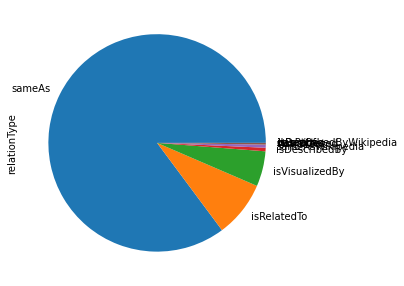

In [118]:
plot = dftot["relationType"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.show()

In [11]:
# objekt med relatedUri borde finnas med Wikicommon objektet som sedan borde 
# peka tillbaka till K-samsök ? 
dftot.head(30)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,updateDate,imageUrl,comment,tag,coordinateValue
0,isVisualizedBy,34865339,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
1,isVisualizedBy,34865338,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
2,isVisualizedBy,34865337,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
3,isVisualizedBy,34865336,http://kulturarvsdata.se/arme/object/AM140139,WikimediaC,http://commons.wikimedia.org/wiki/File:Bandvag...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
4,isVisualizedBy,34865335,http://kulturarvsdata.se/arme/object/AM140139,WikimediaC,http://commons.wikimedia.org/wiki/File:Bandvag...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
5,isVisualizedBy,34865334,http://kulturarvsdata.se/arme/object/AM140139,WikimediaC,http://commons.wikimedia.org/wiki/File:Bandvag...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
6,isVisualizedBy,34865333,http://kulturarvsdata.se/arme/object/AM140137,WikimediaC,http://commons.wikimedia.org/wiki/File:AM.1401...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
7,isVisualizedBy,34865332,http://kulturarvsdata.se/arme/object/AM140137,WikimediaC,http://commons.wikimedia.org/wiki/File:AM.1401...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
8,isVisualizedBy,34865331,http://kulturarvsdata.se/arme/object/AM140137,WikimediaC,http://commons.wikimedia.org/wiki/File:AM.1401...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
9,isVisualizedBy,34865330,http://kulturarvsdata.se/arme/object/AM140137,WikimediaC,http://commons.wikimedia.org/wiki/File:AM.1401...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN


In [12]:
dftot.tail(30)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,updateDate,imageUrl,comment,tag,coordinateValue
99,isVisualizedBy,674,http://kulturarvsdata.se/SMVK-EM/objekt/1019943,Magnus Johansson,http://kulturarvsdata.se/SMVK-VKM/fotografi/13...,Kringla,2012-03-13,NaN,NaN,NaN,NaN,NaN
100,sameAs,673,http://kulturarvsdata.se/SMVK-EM/fotografi/146...,Magnus Johansson,http://kulturarvsdata.se/SMVK-VKM/fotografi/18...,Kringla,2012-03-07,NaN,NaN,NaN,NaN,NaN
101,sameAs,672,http://kulturarvsdata.se/SMVK-VKM/fotografi/18...,Magnus Johansson,http://kulturarvsdata.se/SMVK-EM/fotografi/146...,Kringla,2012-03-07,NaN,NaN,NaN,NaN,NaN
102,isVisualizedBy,670,http://kulturarvsdata.se/SMVK-EM/objekt/1013984,Magnus Johansson,http://kulturarvsdata.se/SMVK-VKM/fotografi/13...,Kringla,2012-02-28,NaN,NaN,NaN,NaN,NaN
103,isDescribedBy,669,http://kulturarvsdata.se/raa/bbr/21400000307373,David Haskiya,http://kulturarvsdata.se/arkitekturmuseet/arkd...,Kringla,2012-02-26,NaN,NaN,NaN,NaN,NaN
104,hasPart,668,http://kulturarvsdata.se/raa/bbr/21400000307373,David Haskiya,http://kulturarvsdata.se/arkitekturmuseet/arkd...,Kringla,2012-02-26,NaN,NaN,NaN,NaN,NaN
105,isDescribedBy,667,http://kulturarvsdata.se/raa/bbr/21400000307373,David Haskiya,http://kulturarvsdata.se/arkitekturmuseet/arkd...,Kringla,2012-02-26,NaN,NaN,NaN,NaN,NaN
106,isVisualizedBy,666,http://kulturarvsdata.se/raa/bbr/21400000307373,David Haskiya,http://kulturarvsdata.se/arkitekturmuseet/arkd...,Kringla,2012-02-26,NaN,NaN,NaN,NaN,NaN
107,isVisualizedBy,665,http://kulturarvsdata.se/raa/bbr/21400000440209,David Haskiya,http://kulturarvsdata.se/raa/kmb/16000200064582,Kringla,2012-02-26,NaN,NaN,NaN,NaN,NaN
108,isVisualizedBy,664,http://kulturarvsdata.se/raa/bbr/21400000440209,David Haskiya,http://kulturarvsdata.se/raa/kmb/16000200064383,Kringla,2012-02-26,NaN,NaN,NaN,NaN,NaN


In [13]:
isCommon = dftot[dftot['relatedUri'].str.contains("commons.wikimedia.org", na=False)]
isCommon.head()

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,updateDate,imageUrl,comment,tag,coordinateValue
0,isVisualizedBy,34865339,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
1,isVisualizedBy,34865338,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
2,isVisualizedBy,34865337,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
3,isVisualizedBy,34865336,http://kulturarvsdata.se/arme/object/AM140139,WikimediaC,http://commons.wikimedia.org/wiki/File:Bandvag...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN
4,isVisualizedBy,34865335,http://kulturarvsdata.se/arme/object/AM140139,WikimediaC,http://commons.wikimedia.org/wiki/File:Bandvag...,Kringla,2020-06-17,NaN,NaN,NaN,NaN,NaN


In [14]:
isCommon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216182 entries, 0 to 199
Data columns (total 12 columns):
relationType       216182 non-null object
id                 216182 non-null int64
objectUri          216182 non-null object
userName           216182 non-null object
relatedUri         216182 non-null object
applicationName    216182 non-null object
createDate         216182 non-null object
updateDate         7 non-null object
imageUrl           0 non-null object
comment            0 non-null object
tag                0 non-null object
coordinateValue    0 non-null object
dtypes: int64(1), object(11)
memory usage: 21.4+ MB


In [15]:
isCommon.relationType.unique()

array(['isVisualizedBy', 'sameAs', 'isRelatedTo'], dtype=object)

In [16]:
isCommon["relationType"].value_counts()

isVisualizedBy    134773
sameAs             81346
isRelatedTo           63
Name: relationType, dtype: int64

In [17]:
isCommon["userName"].value_counts() 

WikimediaC                  134251
Albin Larsson                81346
Bernt Fransson                 196
carwash                         90
Larissa                         52
Holger.Ellgaard                 49
Magnus Johansson                38
Adlitam                         27
Örjan Mattsson                  24
blajo                           19
Lasse Lundqvist                 11
Åsa Johansson                   10
Henrik Summanen                  9
DavidH                           7
jssfrk                           6
Jomal                            5
Eva Vedin                        5
Johan                            4
Magnus Sälgö                     3
Tore Danielsson                  3
Dan Albert Koehl                 3
Hammarkind                       2
David Haskiya                    2
hamrelius                        2
salgo60                          2
kallep                           2
Allivet                          2
Jan Ainali                       2
magnussonp          

In [18]:
isCommon.tail(100)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,updateDate,imageUrl,comment,tag,coordinateValue
116,isVisualizedBy,1669673,http://kulturarvsdata.se/raa/lamning/065f1628-...,Adlitam,https://commons.wikimedia.org/wiki/File:Skepps...,Kringla,2013-12-06,NaN,NaN,NaN,NaN,NaN
131,isVisualizedBy,1669655,http://kulturarvsdata.se/raa/lamning/7ea73cbb-...,Adlitam,https://commons.wikimedia.org/wiki/File:Algbac...,Kringla,2013-12-06,NaN,NaN,NaN,NaN,NaN
133,isVisualizedBy,1669653,http://kulturarvsdata.se/LSH/agents/9534,David Haskiya,http://commons.wikimedia.org/wiki/File:Gustave...,Kringla,2013-12-05,NaN,NaN,NaN,NaN,NaN
134,isVisualizedBy,1669652,http://kulturarvsdata.se/LSH/agents/9534,David Haskiya,http://commons.wikimedia.org/wiki/File:Gustav_...,Kringla,2013-12-05,NaN,NaN,NaN,NaN,NaN
166,isVisualizedBy,1498059,http://kulturarvsdata.se/raa/lamning/ac61481c-...,blajo,https://commons.wikimedia.org/wiki/File:Kvissl...,Kringla,2013-11-09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
127,isVisualizedBy,112887,http://kulturarvsdata.se/raa/bbrp/21620000000042,Jomal,http://commons.wikimedia.org/wiki/File:Osvald_...,Kringla,2012-12-12,NaN,NaN,NaN,NaN,NaN
128,isVisualizedBy,112886,http://kulturarvsdata.se/raa/bbrp/21600000001859,Jomal,http://commons.wikimedia.org/wiki/File:Boberg_...,Kringla,2012-12-12,NaN,NaN,NaN,NaN,NaN
191,isVisualizedBy,94074,http://kulturarvsdata.se/raa/bbrp/21600000013187,Lasse Lundqvist,http://commons.wikimedia.org/wiki/File%3ANicod...,Kringla,2012-12-06,NaN,NaN,NaN,NaN,NaN
196,isVisualizedBy,19379,http://kulturarvsdata.se/raa/bbrp/21600000003542,Henrik Summanen,http://commons.wikimedia.org/wiki/File:Gunnar_...,Kringla,2012-11-12,NaN,NaN,NaN,NaN,NaN


## [Dataroundtrip Wikicommon <-> Kulturarvsdata](#dataroundtrip) 
se även tankar om [Digitaltmuseum dataroundtrip](https://minancestry.blogspot.com/2020/06/draft-kulturnav.html#Dataroundtrip) och [blogpost](https://minancestry.blogspot.com/2020/06/check-status-kulturnav-raa.html)

Skall dataroundtrip fungera behöver vi koppla ihop bilderna så att Wikicommons vet om kulturarvsdata och vice versa

id 1079458  

http://ugc.kulturarvsdata.se/UGC-hub/api?method=retrieve&objectUri=all&contentId=1079458&scope=single  
 
``` 
<response>
 <apiVersion>1.0</apiVersion>
 <relations>
  <relationType>isVisualizedBy</relationType>
  <relatedUri>https://commons.wikimedia.org/wiki/File:Skeppshamns_kapell,_Tyndero_2006-02-27.jpg</relatedUri>
  <tagValue/>
  <coordinateValue/>
  <commentValue/>
  <imageUrl/>
  <id>1079458</id>
  <uri>http://kulturarvsdata.se/raa/kmb/16000200045362</uri>
  <userName>blajo</userName>
  <applicationName>Kringla</applicationName>
  <createDate>2013-09-14</createDate>
  <updateDate/>
 </relations>
</response> 
```
-->   [File:Skeppshamns_kapell,_Tyndero_2006-02-27.jpg](https://commons.wikimedia.org/wiki/File:Skeppshamns_kapell,_Tyndero_2006-02-27.jpg)  
1. används i Wikidata [Q30313619](https://www.wikidata.org/wiki/Q30313619)
1. Wikicommon [M723463](https://commons.wikimedia.org/wiki/Special:EntityData/M723463.json) 
```
{
   entities: {
   M723463: {
   pageid: 723463,
   ns: 6,
   title: "File:Skeppshamns kapell, Tyndero 2006-02-27.jpg",
   lastrevid: 427376612,
   modified: "2020-06-18T20:24:28Z",
   type: "mediainfo",
   id: "M723463",
   labels: { },
   descriptions: { },
   statements: {
      P180: [
          {
             mainsnak: {
                snaktype: "value",
                property: "P180",
                datavalue: {
                   value: {
                      entity-type: "item",
                      numeric-id: 30313619,
                      id: "Q30313619"
                   },
                   type: "wikibase-entityid"
                }
              },
              type: "statement",
              id: "M723463$C3F19032-D57A-4208-B967-0F4C0C8D9E3D",
              rank: "normal"
           }
        ]
     }
    }
  }
}
``` 

### Wikicommons bilden bör peka tillbaka till K-samsök URI  
K-samsök URI = [Wikidata Property 1260](https://www.wikidata.org/wiki/Property:P1260) 

==> **Ny Wikicommon** [M723463](https://commons.wikimedia.org/wiki/Special:EntityData/M723463.json) med länk ** [raa/kmb/16000200045362](http://kulturarvsdata.se/raa/kmb/16000200045362) ** 

```  
{
   entities: {
   M723463: {
   pageid: 723463,
   ns: 6,
   title: "File:Skeppshamns kapell, Tyndero 2006-02-27.jpg",
   lastrevid: 427376612,
   modified: "2020-06-18T20:24:28Z",
   type: "mediainfo",
   id: "M723463",
   labels: { },
   descriptions: { },
   statements: {
      P180: [
          {
             mainsnak: {
                snaktype: "value",
                property: "P180",
                datavalue: {
                   value: {
                      entity-type: "item",
                      numeric-id: 30313619,
                      id: "Q30313619"
                   },
                   type: "wikibase-entityid"
                }
              },
              type: "statement",
              id: "M723463$C3F19032-D57A-4208-B967-0F4C0C8D9E3D",
              rank: "normal"
           }
       ]. 
       P1260: [
          {
             mainsnak: {
               snaktype: "value",
               property: "P1260",
               datavalue: {        
                   value: "raa/kmb/16000200045362",
                   type: "string"
                 }
              },
              type: "statement",
              id: "M723463$5369f899-4667-be9a-f9ba-40d8b90dabcc",
              rank: "normal"
              }
         ]
     }
    }
  }
}
``` 



## Listar unika användare som bidragit


In [19]:
print(dftot.userName.unique())

['WikimediaC' 'Wikipedia' 'Albin Larsson' 'carwash' 'Nixdorf' 'Boberger'
 'Holger.Ellgaard' 'salgo60' 'DavidH' 'Bernt Fransson' 'kallep' 'Larissa'
 'Lasse Lundqvist' 'HLP' 'babben' 'Allivet' 'demithor' 'Allvet'
 'Jan Ainali' 'Anders Lindeberg-Lindvet' 'Magnus Sälgö' 'andersthe'
 'Little Gun' 'kringelkrok' 'Magnus Johansson' 'Lennart T Olsson'
 'tompahvall' 'Tore Danielsson' 'hamrelius' 'Julie' 'Johan' 'nilsw'
 'David Haskiya' 'filosofiedoktor' 'kalle' 'Adlitam' 'Eva Vedin'
 'Hammarkind' 'Work with Sounds' 'jssfrk' 'blajo' 'Dan Albert Koehl'
 'Wilhelm Lagercrantz' 'Tester Testersson' 'Sendelbach' 'Johan Carlström'
 'Anders Wennersten' 'Örjan Mattsson' 'carin' 'Anders Olsson'
 'paulinadevries' 'anna söderström' 'Kalle Johansson' 'Sophie' 'henning'
 'helenabjork' 'Kaysara' 'ekstahagar' 'Åsa Johansson' 'magnussonp'
 'Kicki Ericson' 'LA2' 'Nils Weinander' 'Lotta' 'Per Rohdin'
 'Henrik Summanen' 'Jomal' 'Mikael Lindmark' 'LittleGun99' 'Mjohansson2']


In [20]:
usersActivity = dftot["userName"].value_counts() 
for i,v in dftot["userName"].value_counts().items():
    print(i,"\t",v)

Albin Larsson 	 2420261
WikimediaC 	 134251
carwash 	 20152
Wikipedia 	 11028
Jomal 	 604
Adlitam 	 338
Lasse Lundqvist 	 232
Bernt Fransson 	 196
Larissa 	 159
Magnus Johansson 	 100
Johan 	 93
Holger.Ellgaard 	 82
Eva Vedin 	 50
Allvet 	 40
blajo 	 30
jssfrk 	 27
Örjan Mattsson 	 24
DavidH 	 23
Jan Ainali 	 22
Henrik Summanen 	 18
David Haskiya 	 18
Åsa Johansson 	 16
tompahvall 	 15
Kicki Ericson 	 15
salgo60 	 11
HLP 	 9
nilsw 	 9
Nixdorf 	 9
Allivet 	 8
Anders Lindeberg-Lindvet 	 6
andersthe 	 5
Mikael Lindmark 	 5
paulinadevries 	 5
Magnus Sälgö 	 5
Tore Danielsson 	 4
Dan Albert Koehl 	 4
kalle 	 3
Sendelbach 	 3
carin 	 3
Little Gun 	 3
hamrelius 	 2
Sophie 	 2
LA2 	 2
Mjohansson2 	 2
Johan Carlström 	 2
Hammarkind 	 2
Julie 	 2
kallep 	 2
Work with Sounds 	 2
Wilhelm Lagercrantz 	 2
babben 	 2
kringelkrok 	 2
helenabjork 	 2
Tester Testersson 	 1
Kalle Johansson 	 1
anna söderström 	 1
demithor 	 1
Per Rohdin 	 1
Anders Olsson 	 1
henning 	 1
magnussonp 	 1
Nils Weinander 	 1


In [21]:
percentage = dftot["userName"].value_counts(normalize=True) 


In [22]:
# Top 5 med procent andel --> 96 % gissar jag gjorts med program
percentage[:5]

Albin Larsson    0.935212
WikimediaC       0.051876
carwash          0.007787
Wikipedia        0.004261
Jomal            0.000233
Name: userName, dtype: float64

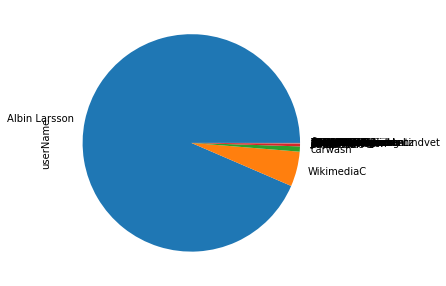

In [117]:
#Visa piechart 
plot = percentage.plot.pie(y='counts', figsize=(5, 5)) 
plt.show()

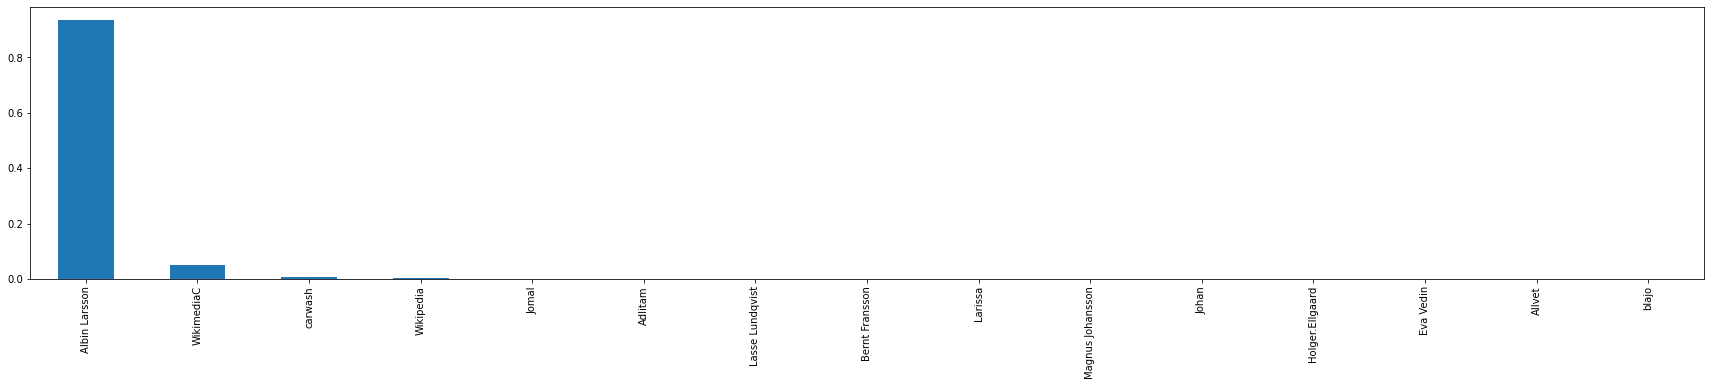

In [119]:
# Visa top 15 
plot2 = percentage[:15].plot.bar(y='counts', figsize=(30, 5))  
plt.show()

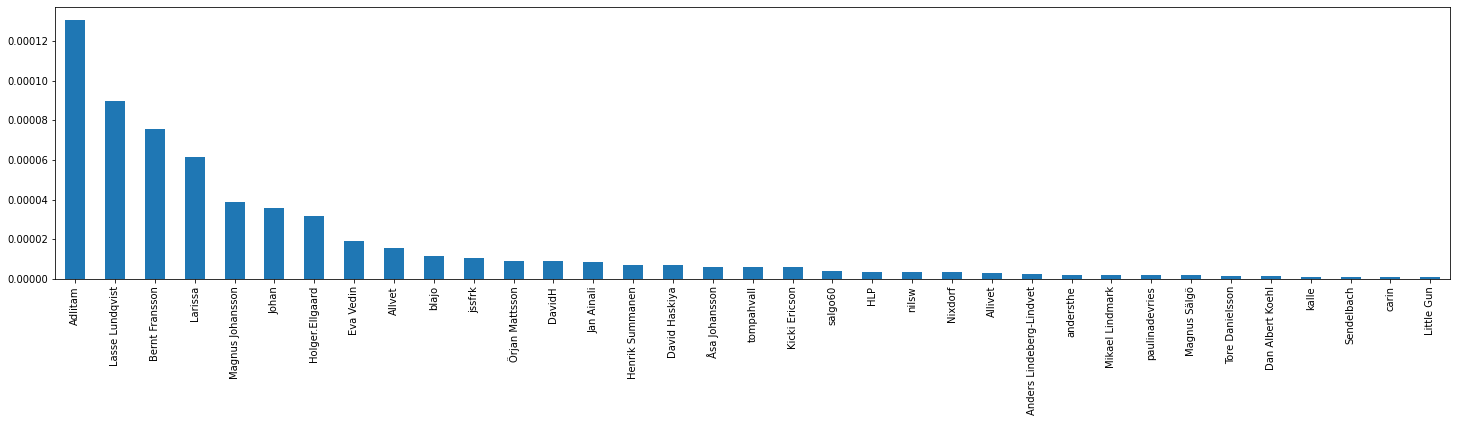

In [114]:
# Visa plats 6-40 
plot2 = percentage[5:40].plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

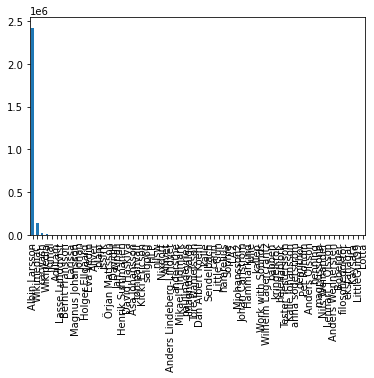

In [26]:
%matplotlib inline  
import matplotlib.pyplot as plt 
users = dftot["userName"].value_counts()

users.plot( kind = 'bar') 
plt.show()

In [27]:
dftot["createDate"].value_counts()

2018-11-28    1000004
2018-12-03     955563
2019-08-05     216202
2018-10-06     156895
2020-06-17     145279
               ...   
2014-05-05          1
2018-12-17          1
2014-02-21          1
2018-03-25          1
2014-11-12          1
Name: createDate, Length: 502, dtype: int64

In [28]:
# UGC äldsta värde är 2012-02-02 (samma år som WD skapades) och 
# mer än hälften av posterna skapades under en dag 2020-06-17 igår...?!?!?
dftot["createDate"].value_counts().sort_index()

2012-02-02         2
2012-02-03         2
2012-02-07         1
2012-02-08         1
2012-02-09         1
               ...  
2020-05-14         1
2020-06-02        15
2020-06-03      2773
2020-06-04      2708
2020-06-17    145279
Name: createDate, Length: 502, dtype: int64

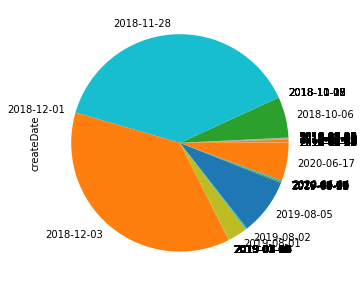

In [120]:
dfCreateDate = dftot["createDate"].value_counts().sort_index()
plotCreateDate = dfCreateDate.plot.pie(y='counts', figsize=(5, 5))  
plt.show()

In [30]:
dfCreateDate.sort_index(level=0) 

2012-02-02         2
2012-02-03         2
2012-02-07         1
2012-02-08         1
2012-02-09         1
               ...  
2020-05-14         1
2020-06-02        15
2020-06-03      2773
2020-06-04      2708
2020-06-17    145279
Name: createDate, Length: 502, dtype: int64

Plot piechart user

check links Europeana and if we have Linkeddata to agents ....

In [31]:
europeana = dftot['relatedUri'].str.contains("data.europeana.eu") 
europeana.describe()

count     2587927
unique          2
top          True
freq      1966045
Name: relatedUri, dtype: object

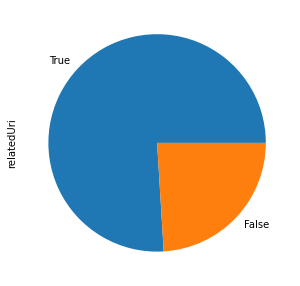

In [32]:
# 75 procent är länkar till Europeana dvs. troligen att samma objekt flyttats till Europeana 
# 
plotEuropeana = europeana.value_counts().plot.pie(y='counts', figsize=(5, 5))  

## Koll om det finns kopplingar länkad data dvs agent  
1966045 kopplingar verkar vara mellan objekt i kulturarvsdata till data.europeana.eu/item/  
Koppling Länkad data hittad dvs. samma som [Europeana Entity](https://www.wikidata.org/wiki/Property:P7704) samma som [Europeana Entity API](https://pro.europeana.eu/page/entity) verkar vara 46 stycken jmf Wikidata Europeana Entity > [160 000](https://www.wikidata.org/wiki/Property:P7704). Gissar att man pekar på uppladdade objekt... 

Dvs. det är i princip ingen semantik som tillförs utan mer info om att en bild flyttats. Europeana i sig är väldigt svagt semantiskt utan verkar bara sitta och gissa se [the sad story of Carl Larsson](https://minancestry.blogspot.com/2020/03/carl-larsson-who-is-that-sadly.html)

In [33]:
europeanaagent = dftot['relatedUri'].str.contains("agent","data.europeana.eu") 
europeanaagent2 = europeanaagent[europeanaagent == True] 
europeanaagent2.describe()

count       46
unique       1
top       True
freq        46
Name: relatedUri, dtype: object

In [34]:
pd.set_option('display.max_rows', None)

In [35]:
pd.options.display.max_rows

In [37]:
#Save session 
#import dill 
#dill.dump_session('ugc_env.db') 
# dill.load_session('ugc_env.db')

## Svensk runbibliografi

In [39]:
Svenskrunbibliografi = dftot[dftot['applicationName'].str.contains("Svensk runbibliografi",na=False)] 


In [41]:
Svenskrunbibliografi.relationType.unique()

array(['isDescribedBy'], dtype=object)

In [42]:
Svenskrunbibliografi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 176 to 197
Data columns (total 12 columns):
relationType       10822 non-null object
id                 10822 non-null int64
objectUri          10822 non-null object
userName           10822 non-null object
relatedUri         10822 non-null object
applicationName    10822 non-null object
createDate         10822 non-null object
updateDate         0 non-null object
imageUrl           0 non-null object
comment            10822 non-null object
tag                0 non-null object
coordinateValue    0 non-null object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [113]:
Svenskrunbibliografi.relatedUri.head(10)

176    http://libris.kb.se/bib/2839747
177    http://libris.kb.se/bib/2839747
178    http://libris.kb.se/bib/2839747
179    http://libris.kb.se/bib/2839747
180    http://libris.kb.se/bib/2839747
181    http://libris.kb.se/bib/2839747
182    http://libris.kb.se/bib/2804388
183    http://libris.kb.se/bib/7644789
184    http://libris.kb.se/bib/7644789
185    http://libris.kb.se/bib/7644789
Name: relatedUri, dtype: object

Still using the old system not LIBRISXL and LIBRISXL seems not link back RAÄ....
* http://libris.kb.se/bib/2839747 correct is   
  * https://libris.kb.se/katalogisering/wd6wddh75pcpmxv ==> 
    * https://libris.kb.se/wd6wddh75pcpmxv/data.jsonld 

In [112]:
# get number of  libris items we reference  
libris = set() 
librisurl = "http://libris.kb.se/resource/bib/"
for index, row in Svenskrunbibliografi.iterrows():
    librisref = row['relatedUri'].split(".se/")[1].split("bib/")[1]
    libris.add(librisref)
    url = librisurl + librisref 
    # Looks like we get status 500 internal error from LIBRIS
    #try: 
        #print (url,librisref)
        #r = http.request('GET', url) 
        #print(r.headers) 
    #except : 
        #print ("\tError")


print ("Number of books linking: ",len(libris))
    

Number of books linking:  676
